In [3]:
import pandas as pd
import numpy as np
from pandas import Series,DataFrame
train = pd.read_csv('./data/feature_hero_dcdd_riva_teama_new.csv')
train_x = train.drop(['1 - DUO_CARRY','1 - DUO_SUPPORT','1 - JUNGLE','1 - MID','1 - TOP',\
                      '2 - DUO_CARRY','2 - DUO_SUPPORT','2 - JUNGLE','2 - MID','2 - TOP',\
                      'carry_vs','support_vs','jungle_vs','mid_vs','top_vs',\
                      'teammates_jungle_mid','teammates_carry_sup','T1 win'],axis=1)
train_y = train[['T1 win']]
del train
print('train_x shape:',train_x.shape)
print('train_y shape:',train_y.shape)

train_x shape: (148634, 76)
train_y shape: (148634, 1)


In [4]:
from sklearn.model_selection import train_test_split, GridSearchCV

X_train, X_valid, y_train, y_valid = train_test_split(train_x, train_y, test_size=0.3, random_state=0)

In [29]:
from lightgbm import LGBMClassifier

model_lgb = LGBMClassifier(boosting_type='gbdt', objective='binary', silent=True)

# model_lgb.fit(X_train, y_train, 
#                   eval_names=['validation'],
#                   eval_metric=['logloss','auc'],
#                   eval_set=[(X_valid, y_valid)],
#                   early_stopping_rounds=10)

param_dist = {"learning_rate" : [0.05],
              "num_leaves": [3,7,10,12,13],
              "min_child_weight": [0.01],
              "min_child_samples":[15] ,
              "num_iterations": [100]
             }

grid_search = GridSearchCV(model_lgb, n_jobs=-1, param_grid=param_dist, cv = 3, scoring="roc_auc", verbose = 3)
grid_search.fit(X_train,y_train)
grid_search.best_estimator_
#[0.01,0.05,0.1]->0.01, [100,300,600]->100
#[0.01,0.05,0.1]->0.05,[31,50,100]->31,[0.01,0.1,1]->0.01,[10,20,30]->20
#[0.05,0.1]->0.05, [20,31,40]->20, [0.01,0.03,0.05]->0.01， [15,20,25]->15
#                   [10,15,20]->10                            [10,15]->15
#                   [3,7,10,12,13]->12





Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  15 | elapsed:    5.3s remaining:   14.8s
[Parallel(n_jobs=-1)]: Done  10 out of  15 | elapsed:    6.4s remaining:    3.1s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    8.7s finished
D:\DevTools\anaconda\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\DevTools\anaconda\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\DevTools\anaconda\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Fou

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.05, max_depth=-1,
               min_child_samples=15, min_child_weight=0.01, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_iterations=100, num_leaves=12,
               objective='binary', random_state=None, reg_alpha=0.0,
               reg_lambda=0.0, silent=True, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

In [33]:
from xgboost import XGBClassifier

model_xgb = XGBClassifier()
param_dist = {"max_depth": [3,4],
              "learning_rate" : [0.07],
              "min_child_weight": [10],
              "num_iterations": [100]
             }
grid_search = GridSearchCV(model_xgb, n_jobs=-1, param_grid=param_dist, cv = 3, scoring="roc_auc", verbose = 3)
grid_search.fit(X_train,y_train)
grid_search.best_estimator_
#[10,30,50]->10, [0.01,0.05,0.1]->0.05, [1,3,6]->6
#[5,10,15]->5, [0.07,0.1,0.16]->0.07, [6,10,15]->10
#          3



Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   6 | elapsed:   29.3s remaining:   14.6s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:   29.9s finished
D:\DevTools\anaconda\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\DevTools\anaconda\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.07, max_delta_step=0, max_depth=3,
              min_child_weight=10, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, num_iterations=100, objective='binary:logistic',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=None, subsample=1, verbosity=1)

In [31]:
from catboost import CatBoostClassifier
model_cb = CatBoostClassifier()
param_dist = {"depth": [1,5,10],
              "learning_rate" : [0.01,0.05,0.1],
              "l2_leaf_reg": [1,5,10],
              "iterations": [100]
             }
grid_search = GridSearchCV(model_cb, n_jobs=-1, param_grid=param_dist, cv = 3, scoring="roc_auc", verbose = 3)
grid_search.fit(X_train,y_train)
grid_search.best_estimator_
#[1,5,10]->10, [0.01,0.05,0.1]->0.1, [1,5,10]->10

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   21.8s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:  7.5min finished


0:	learn: 0.6921986	total: 22.1ms	remaining: 2.19s
1:	learn: 0.6914146	total: 50.9ms	remaining: 2.49s
2:	learn: 0.6905681	total: 70.3ms	remaining: 2.27s
3:	learn: 0.6898924	total: 88ms	remaining: 2.11s
4:	learn: 0.6892608	total: 110ms	remaining: 2.09s
5:	learn: 0.6886389	total: 128ms	remaining: 2s
6:	learn: 0.6881656	total: 148ms	remaining: 1.96s
7:	learn: 0.6876990	total: 175ms	remaining: 2.01s
8:	learn: 0.6873605	total: 196ms	remaining: 1.99s
9:	learn: 0.6870266	total: 214ms	remaining: 1.93s
10:	learn: 0.6867311	total: 237ms	remaining: 1.92s
11:	learn: 0.6863675	total: 261ms	remaining: 1.91s
12:	learn: 0.6861300	total: 279ms	remaining: 1.87s
13:	learn: 0.6859156	total: 315ms	remaining: 1.93s
14:	learn: 0.6856732	total: 346ms	remaining: 1.96s
15:	learn: 0.6854506	total: 367ms	remaining: 1.93s
16:	learn: 0.6852674	total: 385ms	remaining: 1.88s
17:	learn: 0.6850761	total: 404ms	remaining: 1.84s
18:	learn: 0.6848687	total: 424ms	remaining: 1.81s
19:	learn: 0.6846687	total: 447ms	remainin

In [34]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
# from sklearn.ensemble import AdaBoostClassifier
model_xgb = XGBClassifier(max_depth = 3, learning_rate = 0.07, min_child_weight = 10)
model_lgb = LGBMClassifier(learning_rate = 0.05, num_leaves = 12, min_child_samples = 15)
# model_cb = CatBoostClassifier(eval_metric = "AUC",depth = 10, learning_rate = 0.1, l2_leaf_reg = 10,iterations = 500)
model_cb = CatBoostClassifier(eval_metric = "AUC")
# model_ab = AdaBoostClassifier()
print(model_xgb)
print(model_lgb)
print(model_cb)
# print(model_cb2)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.07, max_delta_step=0, max_depth=3,
              min_child_weight=10, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.05, max_depth=-1,
               min_child_samples=15, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=12, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [35]:
model_xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.07, max_delta_step=0, max_depth=3,
              min_child_weight=10, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [36]:
model_lgb.fit(X_train,y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.05, max_depth=-1,
               min_child_samples=15, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=12, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [46]:
model_cb.fit(X_train,y_train)

Learning rate set to 0.062373
0:	total: 19.9ms	remaining: 19.9s
1:	total: 39.5ms	remaining: 19.7s
2:	total: 57ms	remaining: 18.9s
3:	total: 77ms	remaining: 19.2s
4:	total: 106ms	remaining: 21.2s
5:	total: 124ms	remaining: 20.6s
6:	total: 144ms	remaining: 20.5s
7:	total: 164ms	remaining: 20.4s
8:	total: 188ms	remaining: 20.7s
9:	total: 208ms	remaining: 20.6s
10:	total: 227ms	remaining: 20.4s
11:	total: 247ms	remaining: 20.3s
12:	total: 267ms	remaining: 20.3s
13:	total: 286ms	remaining: 20.2s
14:	total: 305ms	remaining: 20.1s
15:	total: 326ms	remaining: 20.1s
16:	total: 346ms	remaining: 20s
17:	total: 366ms	remaining: 20s
18:	total: 388ms	remaining: 20s
19:	total: 409ms	remaining: 20s
20:	total: 429ms	remaining: 20s
21:	total: 448ms	remaining: 19.9s
22:	total: 468ms	remaining: 19.9s
23:	total: 489ms	remaining: 19.9s
24:	total: 508ms	remaining: 19.8s
25:	total: 529ms	remaining: 19.8s
26:	total: 549ms	remaining: 19.8s
27:	total: 571ms	remaining: 19.8s
28:	total: 591ms	remaining: 19.8s
29:	

243:	total: 5.3s	remaining: 16.4s
244:	total: 5.32s	remaining: 16.4s
245:	total: 5.34s	remaining: 16.4s
246:	total: 5.36s	remaining: 16.3s
247:	total: 5.38s	remaining: 16.3s
248:	total: 5.4s	remaining: 16.3s
249:	total: 5.42s	remaining: 16.3s
250:	total: 5.44s	remaining: 16.2s
251:	total: 5.46s	remaining: 16.2s
252:	total: 5.48s	remaining: 16.2s
253:	total: 5.5s	remaining: 16.2s
254:	total: 5.52s	remaining: 16.1s
255:	total: 5.54s	remaining: 16.1s
256:	total: 5.57s	remaining: 16.1s
257:	total: 5.59s	remaining: 16.1s
258:	total: 5.61s	remaining: 16s
259:	total: 5.63s	remaining: 16s
260:	total: 5.64s	remaining: 16s
261:	total: 5.67s	remaining: 16s
262:	total: 5.69s	remaining: 16s
263:	total: 5.72s	remaining: 16s
264:	total: 5.75s	remaining: 15.9s
265:	total: 5.77s	remaining: 15.9s
266:	total: 5.8s	remaining: 15.9s
267:	total: 5.82s	remaining: 15.9s
268:	total: 5.85s	remaining: 15.9s
269:	total: 5.87s	remaining: 15.9s
270:	total: 5.9s	remaining: 15.9s
271:	total: 5.92s	remaining: 15.8s
27

481:	total: 11.2s	remaining: 12s
482:	total: 11.2s	remaining: 12s
483:	total: 11.2s	remaining: 12s
484:	total: 11.3s	remaining: 12s
485:	total: 11.3s	remaining: 11.9s
486:	total: 11.3s	remaining: 11.9s
487:	total: 11.3s	remaining: 11.9s
488:	total: 11.4s	remaining: 11.9s
489:	total: 11.4s	remaining: 11.9s
490:	total: 11.4s	remaining: 11.8s
491:	total: 11.4s	remaining: 11.8s
492:	total: 11.5s	remaining: 11.8s
493:	total: 11.5s	remaining: 11.8s
494:	total: 11.5s	remaining: 11.8s
495:	total: 11.6s	remaining: 11.7s
496:	total: 11.6s	remaining: 11.7s
497:	total: 11.6s	remaining: 11.7s
498:	total: 11.6s	remaining: 11.7s
499:	total: 11.6s	remaining: 11.6s
500:	total: 11.7s	remaining: 11.6s
501:	total: 11.7s	remaining: 11.6s
502:	total: 11.7s	remaining: 11.6s
503:	total: 11.7s	remaining: 11.5s
504:	total: 11.8s	remaining: 11.5s
505:	total: 11.8s	remaining: 11.5s
506:	total: 11.8s	remaining: 11.5s
507:	total: 11.8s	remaining: 11.4s
508:	total: 11.8s	remaining: 11.4s
509:	total: 11.9s	remaining:

725:	total: 17.3s	remaining: 6.51s
726:	total: 17.3s	remaining: 6.49s
727:	total: 17.3s	remaining: 6.46s
728:	total: 17.3s	remaining: 6.44s
729:	total: 17.3s	remaining: 6.41s
730:	total: 17.4s	remaining: 6.39s
731:	total: 17.4s	remaining: 6.36s
732:	total: 17.4s	remaining: 6.34s
733:	total: 17.4s	remaining: 6.31s
734:	total: 17.4s	remaining: 6.29s
735:	total: 17.5s	remaining: 6.26s
736:	total: 17.5s	remaining: 6.24s
737:	total: 17.5s	remaining: 6.21s
738:	total: 17.5s	remaining: 6.19s
739:	total: 17.6s	remaining: 6.17s
740:	total: 17.6s	remaining: 6.15s
741:	total: 17.6s	remaining: 6.13s
742:	total: 17.6s	remaining: 6.1s
743:	total: 17.7s	remaining: 6.08s
744:	total: 17.7s	remaining: 6.06s
745:	total: 17.7s	remaining: 6.03s
746:	total: 17.7s	remaining: 6.01s
747:	total: 17.8s	remaining: 5.98s
748:	total: 17.8s	remaining: 5.96s
749:	total: 17.8s	remaining: 5.94s
750:	total: 17.8s	remaining: 5.91s
751:	total: 17.9s	remaining: 5.89s
752:	total: 17.9s	remaining: 5.86s
753:	total: 17.9s	rem

967:	total: 22.8s	remaining: 754ms
968:	total: 22.8s	remaining: 730ms
969:	total: 22.8s	remaining: 707ms
970:	total: 22.9s	remaining: 683ms
971:	total: 22.9s	remaining: 659ms
972:	total: 22.9s	remaining: 636ms
973:	total: 22.9s	remaining: 612ms
974:	total: 23s	remaining: 589ms
975:	total: 23s	remaining: 565ms
976:	total: 23s	remaining: 541ms
977:	total: 23s	remaining: 518ms
978:	total: 23s	remaining: 494ms
979:	total: 23.1s	remaining: 471ms
980:	total: 23.1s	remaining: 447ms
981:	total: 23.1s	remaining: 423ms
982:	total: 23.1s	remaining: 400ms
983:	total: 23.1s	remaining: 376ms
984:	total: 23.2s	remaining: 353ms
985:	total: 23.2s	remaining: 329ms
986:	total: 23.2s	remaining: 306ms
987:	total: 23.3s	remaining: 282ms
988:	total: 23.3s	remaining: 259ms
989:	total: 23.3s	remaining: 235ms
990:	total: 23.3s	remaining: 212ms
991:	total: 23.3s	remaining: 188ms
992:	total: 23.4s	remaining: 165ms
993:	total: 23.4s	remaining: 141ms
994:	total: 23.4s	remaining: 118ms
995:	total: 23.4s	remaining: 9

In [41]:
# model_cb2 = CatBoostClassifier(eval_metric = "AUC", iterations = 500)
# model_cb2.fit(X_train,y_train)

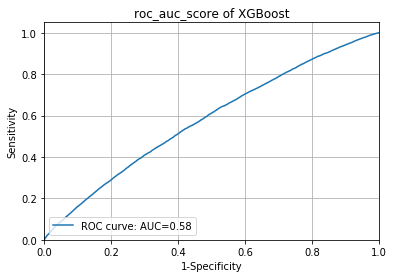

XGBoost auc_score: 0.5794959095948244


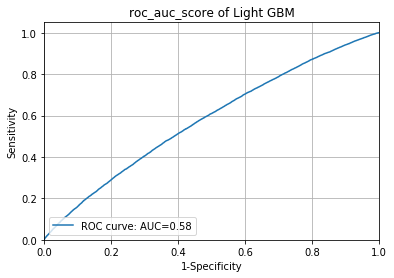

Light GBM auc_score: 0.5793234880560175


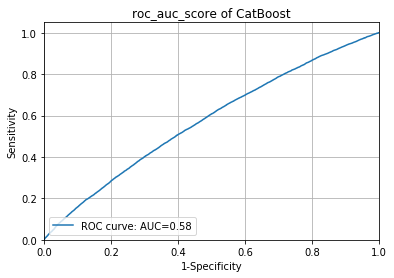

CatBoost auc_score: 0.575409313950054


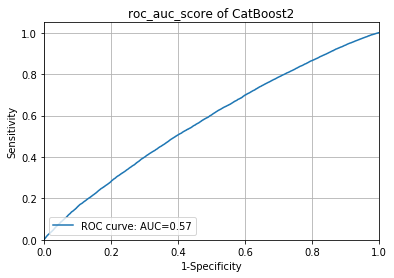

CatBoost2 auc_score: 0.5746556772092573

 AUC score:
xgb: (0.601399111115026, 0.5794959095948244)
lgb: (0.6048283615437429, 0.5793234880560175)
cb: (0.7469413398457843, 0.575409313950054)

 accuricy score:
xgb: (0.572542122007247, 0.5581395348837209)
lgb: (0.5739357765539248, 0.5560987643246394)
cb: (0.6760762377094086, 0.5548429055190509)

 precision score:
xgb: (0.5744318277683106, 0.563768115942029)
lgb: (0.5761988920232471, 0.5623694478382533)
cb: (0.6746466068913884, 0.5637691266357632)

 f1 score:
xgb: (0.604907343247517, 0.5936604178267235)
lgb: (0.6047100576941941, 0.5904576677977323)
cb: (0.6919265786683243, 0.5806574277505492)


In [52]:
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
def auc(m, train, valid): 
    return (metrics.roc_auc_score(y_train,m.predict_proba(train)[:,1]),
                            metrics.roc_auc_score(y_valid,m.predict_proba(valid)[:,1]))

def acc(m, train, valid): 
    return (metrics.accuracy_score(y_train,m.predict(train)),
                            metrics.accuracy_score(y_valid,m.predict(valid)))

def precision(m, train, valid): 
    return (metrics.precision_score(y_train,m.predict(train)),
                            metrics.precision_score(y_valid,m.predict(valid)))

def f1(m, train, valid): 
    return (metrics.f1_score(y_train,m.predict(train)),
                            metrics.f1_score(y_valid,m.predict(valid)))

def plot_auc(labels, y_predict_proba,title):
    
    auc = metrics.roc_auc_score(labels, y_predict_proba)
    fpr, tpr, thresholds = metrics.roc_curve(labels, y_predict_proba)
    curve_roc = np.array([fpr, tpr])

    plt.plot(fpr, tpr, label='ROC curve: AUC={0:0.2f}'.format(auc))
    plt.xlabel('1-Specificity')
    plt.ylabel('Sensitivity')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('roc_auc_score of '+title)
    plt.grid(True)
    plt.legend(loc="lower left")
    plt.show()
    return auc 

print('XGBoost auc_score:',plot_auc(y_valid, model_xgb.predict_proba(X_valid)[:,1],'XGBoost'))
print('Light GBM auc_score:',plot_auc(y_valid, model_lgb.predict_proba(X_valid)[:,1],'Light GBM'))
print('CatBoost auc_score:',plot_auc(y_valid, model_cb.predict_proba(X_valid)[:,1],'CatBoost'))
print('CatBoost2 auc_score:',plot_auc(y_valid, model_cb2.predict_proba(X_valid)[:,1],'CatBoost2'))

print('\n','AUC score:')
print("xgb:",auc(model_xgb,X_train,X_valid))
print("lgb:",auc(model_lgb,X_train,X_valid))
print("cb:",auc(model_cb,X_train,X_valid))
# print("cb2:",auc(model_cb2,X_train,X_valid))

print('\n','accuricy score:')
print("xgb:",acc(model_xgb,X_train,X_valid))
print("lgb:",acc(model_lgb,X_train,X_valid))
print("cb:",acc(model_cb,X_train,X_valid))
# print("cb2:",acc(model_cb2,X_train,X_valid))

print('\n','precision score:')
print("xgb:",precision(model_xgb,X_train,X_valid))
print("lgb:",precision(model_lgb,X_train,X_valid))
print("cb:",precision(model_cb,X_train,X_valid))
# print("cb2:",precision(model_cb2,X_train,X_valid))

print('\n','f1 score:')
print("xgb:",f1(model_xgb,X_train,X_valid))
print("lgb:",f1(model_lgb,X_train,X_valid))
print("cb:",f1(model_cb,X_train,X_valid))
# print("cb2:",f1(model_cb2,X_train,X_valid))





